In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import tensorflow as tf

In [288]:
df = pd.read_csv("Stats.csv",index_col = 0)

In [289]:
df

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.10%,3509,704,40,464
1,55.8,15.80%,4771,753,54,591
2,47.6,16.70%,3526,589,59,549
3,47.5,15.20%,3184,484,42,442
4,24.7,10.30%,3481,359,66,583
...,...,...,...,...,...,...
1008,23.0,14.60%,1484,216,51,404
1009,20.5,11.40%,2013,230,45,458
1010,19.5,9.70%,3065,298,77,607
1011,10.2,5.30%,2203,116,41,417


In [290]:
len(df)

1013

In [291]:
df = df[1:]

In [292]:
def proc(acc):
    acc = acc[:-1]
    return acc

In [293]:
df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)

C:\Users\kacpe\AppData\Local\Temp/ipykernel_24728/1612334256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)


In [294]:
#sns.pairplot(df)

In [295]:
from sklearn.model_selection import train_test_split

In [296]:
X = df.drop("Rating", axis = 1)
y = df["Rating"]

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)


In [298]:
X_train

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
293,14.5,1620,235,15,224
541,11.7,3078,361,75,667
674,14.6,1126,164,44,348
837,13.1,738,97,20,130
547,12.4,2582,319,25,357
...,...,...,...,...,...
382,5.9,7076,415,114,949
272,11.3,1097,124,50,395
62,14.8,758,112,59,369
740,9.3,2580,239,41,421


In [299]:
scaler = MinMaxScaler()

In [300]:
X_train = scaler.fit_transform(X_train)

In [301]:
X_test = scaler.transform(X_test)

In [302]:
X_train.shape

(809, 5)

In [303]:
X_test.shape

(203, 5)

In [304]:
#Deep Learining

In [305]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [223]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [224]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
7/7 [==============================] - 1s 22ms/step - loss: 47.0765 - val_loss: 46.7398
Epoch 2/400
7/7 [==============================] - 0s 5ms/step - loss: 46.9795 - val_loss: 46.6037
Epoch 3/400
7/7 [==============================] - 0s 5ms/step - loss: 46.8105 - val_loss: 46.3645
Epoch 4/400
7/7 [==============================] - 0s 5ms/step - loss: 46.5106 - val_loss: 45.9431
Epoch 5/400
7/7 [==============================] - 0s 5ms/step - loss: 45.9807 - val_loss: 45.1828
Epoch 6/400
7/7 [==============================] - 0s 5ms/step - loss: 45.0175 - val_loss: 43.7877
Epoch 7/400
7/7 [==============================] - 0s 5ms/step - loss: 43.2391 - val_loss: 41.2100
Epoch 8/400
7/7 [==============================] - 0s 5ms/step - loss: 39.9822 - val_loss: 36.5353
Epoch 9/400
7/7 [==============================] - 0s 5ms/step - loss: 34.2232 - val_loss: 28.8276
Epoch 10/400
7/7 [==============================] - 0s 5ms/step - loss: 26.0824 - val_loss: 21.8988
Epoch 11

7/7 [==============================] - 0s 5ms/step - loss: 5.3450 - val_loss: 6.3857
Epoch 85/400
7/7 [==============================] - 0s 5ms/step - loss: 5.3498 - val_loss: 6.3697
Epoch 86/400
7/7 [==============================] - 0s 5ms/step - loss: 5.3534 - val_loss: 6.3536
Epoch 87/400
7/7 [==============================] - 0s 5ms/step - loss: 5.3942 - val_loss: 6.3384
Epoch 88/400
7/7 [==============================] - 0s 5ms/step - loss: 5.3604 - val_loss: 6.3262
Epoch 89/400
7/7 [==============================] - 0s 5ms/step - loss: 5.2968 - val_loss: 6.3508
Epoch 90/400
7/7 [==============================] - 0s 5ms/step - loss: 5.2713 - val_loss: 6.3006
Epoch 91/400
7/7 [==============================] - 0s 5ms/step - loss: 5.2957 - val_loss: 6.2907
Epoch 92/400
7/7 [==============================] - 0s 5ms/step - loss: 5.3913 - val_loss: 6.3434
Epoch 93/400
7/7 [==============================] - 0s 5ms/step - loss: 5.3381 - val_loss: 6.3805
Epoch 94/400
7/7 [===============

7/7 [==============================] - 0s 5ms/step - loss: 4.5933 - val_loss: 5.1346
Epoch 168/400
7/7 [==============================] - 0s 5ms/step - loss: 4.4745 - val_loss: 5.0741
Epoch 169/400
7/7 [==============================] - 0s 5ms/step - loss: 4.4418 - val_loss: 5.0491
Epoch 170/400
7/7 [==============================] - 0s 5ms/step - loss: 4.4376 - val_loss: 5.0842
Epoch 171/400
7/7 [==============================] - 0s 5ms/step - loss: 4.5434 - val_loss: 5.0927
Epoch 172/400
7/7 [==============================] - 0s 5ms/step - loss: 4.5736 - val_loss: 5.0804
Epoch 173/400
7/7 [==============================] - 0s 5ms/step - loss: 4.5335 - val_loss: 5.1443
Epoch 174/400
7/7 [==============================] - 0s 5ms/step - loss: 4.4469 - val_loss: 5.0404
Epoch 175/400
7/7 [==============================] - 0s 5ms/step - loss: 4.3874 - val_loss: 5.0705
Epoch 176/400
7/7 [==============================] - 0s 5ms/step - loss: 4.4017 - val_loss: 5.0056
Epoch 177/400
7/7 [=====

Epoch 250/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0737 - val_loss: 4.6760
Epoch 251/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0930 - val_loss: 4.7249
Epoch 252/400
7/7 [==============================] - 0s 5ms/step - loss: 4.1440 - val_loss: 4.6724
Epoch 253/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0412 - val_loss: 4.6672
Epoch 254/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0323 - val_loss: 4.6573
Epoch 255/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0370 - val_loss: 4.6343
Epoch 256/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0472 - val_loss: 4.6307
Epoch 257/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0340 - val_loss: 4.6625
Epoch 258/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0352 - val_loss: 4.6361
Epoch 259/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0472 - val_loss: 4.9169
Epoch 260/

7/7 [==============================] - 0s 5ms/step - loss: 4.0148 - val_loss: 4.7385
Epoch 333/400
7/7 [==============================] - 0s 5ms/step - loss: 4.0097 - val_loss: 4.5731
Epoch 334/400
7/7 [==============================] - 0s 5ms/step - loss: 3.9791 - val_loss: 4.4929
Epoch 335/400
7/7 [==============================] - 0s 5ms/step - loss: 3.9647 - val_loss: 4.5552
Epoch 336/400
7/7 [==============================] - 0s 5ms/step - loss: 3.9002 - val_loss: 4.6224
Epoch 337/400
7/7 [==============================] - 0s 5ms/step - loss: 3.9990 - val_loss: 4.5197
Epoch 338/400
7/7 [==============================] - 0s 5ms/step - loss: 3.9182 - val_loss: 4.4547
Epoch 339/400
7/7 [==============================] - 0s 5ms/step - loss: 3.9496 - val_loss: 4.4604
Epoch 340/400
7/7 [==============================] - 0s 5ms/step - loss: 3.9351 - val_loss: 4.5467
Epoch 341/400
7/7 [==============================] - 0s 5ms/step - loss: 4.1072 - val_loss: 4.7134
Epoch 342/400
7/7 [=====

In [225]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

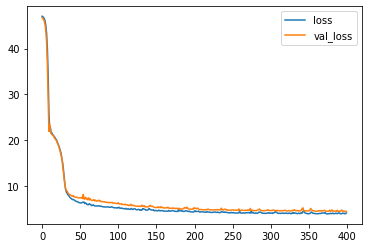

In [226]:
losses.plot()

In [227]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [228]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [229]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.359376660004037
MSE: 71.95359654398634
RMSE: 8.482546583661438


In [230]:
#Much better 
# Error is 2 times smaller and Neuron Model copes better with outliers

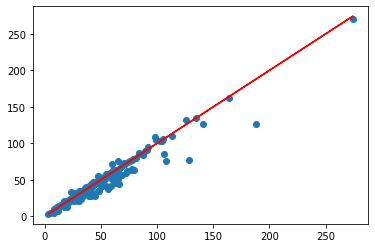

In [231]:
# Our predictions
plt.scatter(y_test,predictions)

# Real Value
plt.plot(y_test,y_test,'r')

In [232]:
#Project Output

In [233]:
y_test.values.reshape(len(X_test))
df1 = pd.DataFrame(y_test.values.reshape(len(X_test),1))
df2 = pd.DataFrame(predictions)
df3 = pd.DataFrame(X_test)
df12 = pd.concat([df1,df2], axis = 1)

In [234]:
data = pd.DataFrame(X_test)
data = data.reset_index()
data = data.drop("index", axis = 1)
data

,0,1,2,3,4
0,0.236080,0.079689,0.059021,0.128205,0.071834
1,0.300668,0.283827,0.200537,0.529915,0.444234
2,0.340757,0.554887,0.416499,0.179487,0.252363
3,0.452116,0.085266,0.118042,0.461538,0.234405
4,0.458797,0.433519,0.447351,0.282051,0.304348
...,...,...,...,...,...
198,0.342984,0.115644,0.111335,0.495726,0.349716
199,0.354120,0.144702,0.136150,0.059829,0.137051
200,0.371938,0.080129,0.093226,0.247863,0.156900
201,0.525612,0.347520,0.420523,0.435897,0.481096


In [235]:
final = pd.concat([data,df12],axis = 1)
final.columns = ['Accuracy', 'Shot fired', 'Hits', 'Deaths',"DMG_Get", 'Rating', "Predictions"]
final.drop(['Accuracy', 'Shot fired', 'Hits', 'Deaths',"DMG_Get"],axis = 1,inplace=True)
final

,Rating,Predictions
0,32.0,32.714943
1,25.1,29.277121
2,89.5,89.595596
3,39.1,41.977283
4,105.7,85.975525
...,...,...
198,26.5,24.567263
199,49.5,48.015274
200,36.1,34.469349
201,62.0,57.070957


In [236]:
final["Diff"] = final["Rating"] - final["Predictions"]

In [237]:
final

,Rating,Predictions,Diff
0,32.0,32.714943,-0.714943
1,25.1,29.277121,-4.177121
2,89.5,89.595596,-0.095596
3,39.1,41.977283,-2.877283
4,105.7,85.975525,19.724475
...,...,...,...
198,26.5,24.567263,1.932737
199,49.5,48.015274,1.484726
200,36.1,34.469349,1.630651
201,62.0,57.070957,4.929043


In [238]:
len(final[abs(final["Diff"]) < 5]) / len(final) * 100

75.36945812807882

# Without Outlaiers

In [306]:
df_100 = df[df["Rating"] < 100]

In [307]:
df_100

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,55.8,15.8,4771,753,54,591
2,47.6,16.7,3526,589,59,549
3,47.5,15.2,3184,484,42,442
4,24.7,10.3,3481,359,66,583
5,24.4,14.5,2365,343,68,603
...,...,...,...,...,...,...
1008,23.0,14.6,1484,216,51,404
1009,20.5,11.4,2013,230,45,458
1010,19.5,9.7,3065,298,77,607
1011,10.2,5.3,2203,116,41,417


In [308]:
X = df_100.drop("Rating", axis = 1)

In [309]:
X

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,15.8,4771,753,54,591
2,16.7,3526,589,59,549
3,15.2,3184,484,42,442
4,10.3,3481,359,66,583
5,14.5,2365,343,68,603
...,...,...,...,...,...
1008,14.6,1484,216,51,404
1009,11.4,2013,230,45,458
1010,9.7,3065,298,77,607
1011,5.3,2203,116,41,417


In [310]:
y = df_100["Rating"]

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [312]:
X_test.to_csv("data/X_test_ann.csv", encoding="utf-8")
y_test.to_csv("data/y_test_ann.csv", encoding="utf-8")
X_train.to_csv("data/X_train_ann.csv", encoding="utf-8")
y_train.to_csv("data/y_train_ann.csv", encoding="utf-8")

In [313]:
X_train

,Accuracy,Shot fired,Hits,Deaths,DMG_Get
535,8.4,3107,262,51,475
827,18.2,1193,217,39,312
331,22.1,4255,940,45,456
361,23.9,619,148,13,107
445,8.1,1439,116,35,264
...,...,...,...,...,...
410,15.2,1587,242,53,374
294,13.8,1293,178,17,186
65,15.8,3220,509,36,382
794,18.4,1573,289,26,192


In [314]:
scaler = MinMaxScaler()

In [315]:
X_train = scaler.fit_transform(X_train)

In [316]:
X_test = scaler.transform(X_test)

In [317]:
X_test_df = pd.DataFrame(X_test)

In [318]:
y_test_df = pd.DataFrame(y_test)

In [319]:
X_test_df.columns = ['Accuracy', 'Shot fired', 'Hits', 'Deaths', 'DMG_Get']

In [320]:
y_test_df.columns

Index(['Rating'], dtype='object')

In [255]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
6/6 [==============================] - 0s 10ms/step - loss: 3.7823 - val_loss: 3.7711
Epoch 2/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7096 - val_loss: 3.2674
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5944 - val_loss: 3.3558
Epoch 4/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5592 - val_loss: 3.3851
Epoch 5/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5679 - val_loss: 3.2923
Epoch 6/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5382 - val_loss: 3.2736
Epoch 7/400
6/6 [==============================] - 0s 7ms/step - loss: 3.5063 - val_loss: 3.3053
Epoch 8/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5204 - val_loss: 3.3063
Epoch 9/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4875 - val_loss: 3.2799
Epoch 10/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5019 - val_loss: 3.2659
Epoch 11/400
6/6 [==========

6/6 [==============================] - 0s 6ms/step - loss: 3.4160 - val_loss: 3.2618
Epoch 85/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4033 - val_loss: 3.2521
Epoch 86/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4198 - val_loss: 3.2435
Epoch 87/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4064 - val_loss: 3.3054
Epoch 88/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3997 - val_loss: 3.2707
Epoch 89/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4411 - val_loss: 3.3179
Epoch 90/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4504 - val_loss: 3.3190
Epoch 91/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4384 - val_loss: 3.2442
Epoch 92/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4033 - val_loss: 3.2394
Epoch 93/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4113 - val_loss: 3.2267
Epoch 94/400
6/6 [===============

6/6 [==============================] - 0s 6ms/step - loss: 3.3621 - val_loss: 3.3524
Epoch 168/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4705 - val_loss: 3.3189
Epoch 169/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4577 - val_loss: 3.2715
Epoch 170/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4393 - val_loss: 3.2404
Epoch 171/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4225 - val_loss: 3.2429
Epoch 172/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3918 - val_loss: 3.2307
Epoch 173/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3583 - val_loss: 3.2278
Epoch 174/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3700 - val_loss: 3.2769
Epoch 175/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4367 - val_loss: 3.4347
Epoch 176/400
6/6 [==============================] - 0s 6ms/step - loss: 3.5151 - val_loss: 3.4182
Epoch 177/400
6/6 [=====

Epoch 250/400
6/6 [==============================] - 0s 5ms/step - loss: 3.3211 - val_loss: 3.1975
Epoch 251/400
6/6 [==============================] - 0s 5ms/step - loss: 3.3498 - val_loss: 3.3021
Epoch 252/400
6/6 [==============================] - 0s 5ms/step - loss: 3.3809 - val_loss: 3.2321
Epoch 253/400
6/6 [==============================] - 0s 5ms/step - loss: 3.3596 - val_loss: 3.2143
Epoch 254/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3501 - val_loss: 3.2237
Epoch 255/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3252 - val_loss: 3.2174
Epoch 256/400
6/6 [==============================] - 0s 5ms/step - loss: 3.3319 - val_loss: 3.2071
Epoch 257/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3205 - val_loss: 3.2034
Epoch 258/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3135 - val_loss: 3.2021
Epoch 259/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3324 - val_loss: 3.2436
Epoch 260/

6/6 [==============================] - 0s 6ms/step - loss: 3.3382 - val_loss: 3.3290
Epoch 333/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4169 - val_loss: 3.3069
Epoch 334/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3727 - val_loss: 3.3387
Epoch 335/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3856 - val_loss: 3.2977
Epoch 336/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3949 - val_loss: 3.3606
Epoch 337/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4147 - val_loss: 3.2583
Epoch 338/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3530 - val_loss: 3.2675
Epoch 339/400
6/6 [==============================] - 0s 5ms/step - loss: 3.3475 - val_loss: 3.2420
Epoch 340/400
6/6 [==============================] - 0s 6ms/step - loss: 3.4085 - val_loss: 3.2497
Epoch 341/400
6/6 [==============================] - 0s 6ms/step - loss: 3.3941 - val_loss: 3.2909
Epoch 342/400
6/6 [=====

In [256]:
predictions = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [257]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.246950452829663
MSE: 30.73715019165068
RMSE: 5.544109503937551


In [258]:
df.head(1)

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
1,55.8,15.8,4771,753,54,591


In [259]:
to_predict = [[15.8,4771,753,54,591]]

In [260]:
to_predict_s = scaler.transform(to_predict)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [261]:
to_predict_s

array([[0.3518931 , 0.65805694, 0.50503018, 0.44444444, 0.52646503]])

In [262]:
pred = model.predict(to_predict_s)

1/1 [==============================] - 0s 15ms/step


In [263]:
pred

array([[56.067036]], dtype=float32)

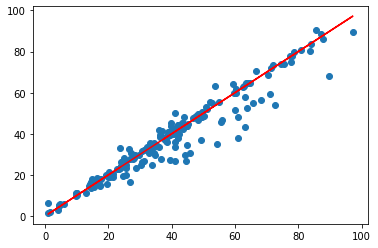

In [264]:
plt.scatter(y_test,predictions)

# Real Value
plt.plot(y_test,y_test,'r')

In [321]:
tf.keras.models.save_model(model, "models/ann.hdf5")

In [322]:
len(X_test_df)

190

In [323]:
X_test_df.to_csv("data/X_test.csv", encoding="utf-8")
y_test_df.to_csv("data/y_test.csv", encoding="utf-8")

# Cheated ANN

In [345]:
X = df_100[["Accuracy","Hits","DMG_Get"]]

In [346]:
y = df_100["Rating"]

In [347]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [348]:
X_test.to_csv("data/X_test_ann_3.csv", encoding="utf-8")
y_test.to_csv("data/y_test_ann_3.csv", encoding="utf-8")
X_train.to_csv("data/X_train_ann_3.csv", encoding="utf-8")
y_train.to_csv("data/y_train_ann_3.csv", encoding="utf-8")

In [349]:
X_train = scaler.fit_transform(X_train)

In [350]:
X_test = scaler.transform(X_test)

In [351]:
X_test_df = pd.DataFrame(X_test)

In [352]:
y_test_df = pd.DataFrame(y_test)

In [353]:
X_test_df.columns = ['Accuracy', 'Hits', 'DMG_Get']

In [354]:
model_3 = Sequential()

model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
model_3.add(Dense(19,activation='relu'))
#model.add(Dense(6,activation='relu'))
model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mae')

In [355]:
model_3.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
6/6 [==============================] - 1s 30ms/step - loss: 41.5654 - val_loss: 39.3085
Epoch 2/400
6/6 [==============================] - 0s 6ms/step - loss: 41.5347 - val_loss: 39.2716
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 41.4923 - val_loss: 39.2186
Epoch 4/400
6/6 [==============================] - 0s 6ms/step - loss: 41.4283 - val_loss: 39.1352
Epoch 5/400
6/6 [==============================] - 0s 6ms/step - loss: 41.3257 - val_loss: 38.9971
Epoch 6/400
6/6 [==============================] - 0s 6ms/step - loss: 41.1516 - val_loss: 38.7576
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - loss: 40.8420 - val_loss: 38.3250
Epoch 8/400
6/6 [==============================] - 0s 6ms/step - loss: 40.2777 - val_loss: 37.5283
Epoch 9/400
6/6 [==============================] - 0s 7ms/step - loss: 39.2219 - val_loss: 36.0405
Epoch 10/400
6/6 [==============================] - 0s 7ms/step - loss: 37.2134 - val_loss: 33.2439
Epoch 11

Epoch 84/400
6/6 [==============================] - 0s 6ms/step - loss: 5.1991 - val_loss: 5.4871
Epoch 85/400
6/6 [==============================] - 0s 6ms/step - loss: 5.2102 - val_loss: 5.4036
Epoch 86/400
6/6 [==============================] - 0s 6ms/step - loss: 5.0916 - val_loss: 5.3568
Epoch 87/400
6/6 [==============================] - 0s 5ms/step - loss: 5.0603 - val_loss: 5.3355
Epoch 88/400
6/6 [==============================] - 0s 6ms/step - loss: 5.0474 - val_loss: 5.3218
Epoch 89/400
6/6 [==============================] - 0s 6ms/step - loss: 5.0706 - val_loss: 5.3028
Epoch 90/400
6/6 [==============================] - 0s 6ms/step - loss: 5.0906 - val_loss: 5.5026
Epoch 91/400
6/6 [==============================] - 0s 6ms/step - loss: 5.0940 - val_loss: 5.3698
Epoch 92/400
6/6 [==============================] - 0s 6ms/step - loss: 5.0838 - val_loss: 5.2576
Epoch 93/400
6/6 [==============================] - 0s 6ms/step - loss: 5.0789 - val_loss: 5.3868
Epoch 94/400
6/6 [==

Epoch 167/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2342 - val_loss: 4.3622
Epoch 168/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2619 - val_loss: 4.3502
Epoch 169/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2196 - val_loss: 4.3157
Epoch 170/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2338 - val_loss: 4.3270
Epoch 171/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2170 - val_loss: 4.3102
Epoch 172/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2371 - val_loss: 4.3218
Epoch 173/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2507 - val_loss: 4.3037
Epoch 174/400
6/6 [==============================] - 0s 5ms/step - loss: 4.2133 - val_loss: 4.2825
Epoch 175/400
6/6 [==============================] - 0s 6ms/step - loss: 4.1746 - val_loss: 4.2832
Epoch 176/400
6/6 [==============================] - 0s 6ms/step - loss: 4.2370 - val_loss: 4.3124
Epoch 177/

6/6 [==============================] - 0s 6ms/step - loss: 3.8855 - val_loss: 3.9470
Epoch 250/400
6/6 [==============================] - 0s 5ms/step - loss: 3.8930 - val_loss: 3.9183
Epoch 251/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8821 - val_loss: 3.9389
Epoch 252/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8632 - val_loss: 3.9453
Epoch 253/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8602 - val_loss: 3.9595
Epoch 254/400
6/6 [==============================] - 0s 5ms/step - loss: 3.9477 - val_loss: 3.9901
Epoch 255/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8960 - val_loss: 4.0875
Epoch 256/400
6/6 [==============================] - 0s 6ms/step - loss: 4.0093 - val_loss: 3.9927
Epoch 257/400
6/6 [==============================] - 0s 6ms/step - loss: 3.9222 - val_loss: 3.9290
Epoch 258/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8810 - val_loss: 3.9203
Epoch 259/400
6/6 [=====

Epoch 332/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8471 - val_loss: 3.8439
Epoch 333/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8263 - val_loss: 3.8970
Epoch 334/400
6/6 [==============================] - 0s 5ms/step - loss: 3.7807 - val_loss: 3.8324
Epoch 335/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7643 - val_loss: 3.9210
Epoch 336/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8237 - val_loss: 3.8965
Epoch 337/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8659 - val_loss: 3.8291
Epoch 338/400
6/6 [==============================] - 0s 6ms/step - loss: 3.8897 - val_loss: 3.8787
Epoch 339/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7733 - val_loss: 3.8372
Epoch 340/400
6/6 [==============================] - 0s 6ms/step - loss: 3.7617 - val_loss: 3.8201
Epoch 341/400
6/6 [==============================] - 0s 5ms/step - loss: 3.7588 - val_loss: 3.8497
Epoch 342/

In [356]:
predictions = model_3.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [357]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.7789997511161006
MSE: 37.949613980225685
RMSE: 6.160325801467459


In [358]:
tf.keras.models.save_model(model_3, "models/ann_3.hdf5")

In [359]:
X_test_df.to_csv("data/X_test_3.csv", encoding="utf-8")
y_test_df.to_csv("data/y_test_3.csv", encoding="utf-8")

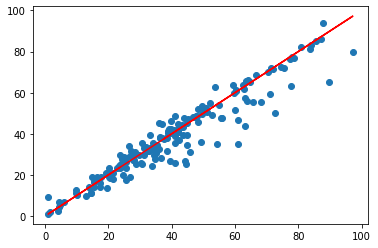

In [360]:
plt.scatter(y_test,predictions)

# Real Value
plt.plot(y_test,y_test,'r')